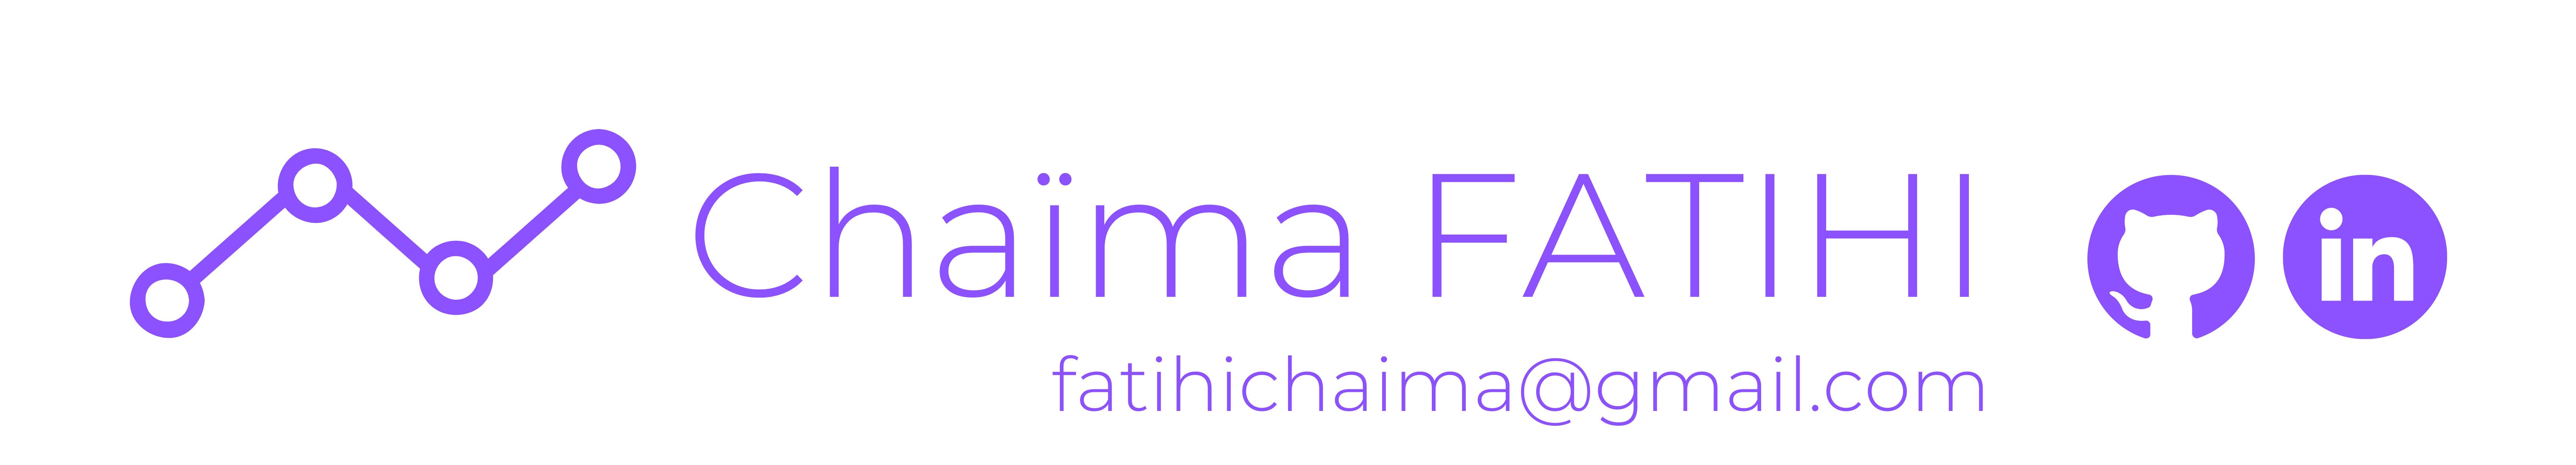

# Data Analysis w/h Python 3

**Analysis of SpaceX Launches** 

<i> Objective: Collect data from the SpaceX's API, clean and proceed to data wrangling to start an exploratory data analysis. </i>

One of SpaceX's secrets to make space travel affordable is savings. As a matter of fact, rocket launches are relatively inexpensive because SpaceX can reuse the first stage of the rocket which does most of the work. Therefore, we can determine if the first stage will land through data analysis and forecasting to predict if SpaceX will reuse the first stage and thus determine the price of each launch.


Created the 10/21/2022 \
Latest version 10/27/2022

## Data Collection

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime

# Set an option that will print all columns of a dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In a first part, we will define a series of functions that will hep us using the API and extracting informations using identification numbers, as: the rocket name, the launch site, the payload mass and orbit and the outcomne of the landing.

In [2]:
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [3]:
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

In [4]:
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [5]:
def getCoreData(data):
    for core in data['cores']:
        if core['core'] != None:
            response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
            Block.append(response['block'])
            ReusedCount.append(response['reuse_count'])
            Serial.append(response['serial'])
        else:
            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)
        Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
        Flights.append(core['flight'])
        GridFins.append(core['gridfins'])
        Reused.append(core['reused'])
        Legs.append(core['legs'])
        LandingPad.append(core['landpad'])

The data is requested from the SpaceX API with the following URL:

In [6]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

We verify that the requesting was successful by checking if the status response code is 200:

In [7]:
response.status_code

200

In [8]:
# The response content is decoded through a Json and turn into a Pandas dataframe
data = pd.json_normalize(response.json())
data.head(2)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN


We can notice that a lot of the data are IDs. For example, the rocket column has no information about the rocket name just an identification number. \
We will use the API again to display the information concerning this IDs: this is our next step.

# Data Wrangling

In [9]:
# Concentrate on a subset of the dataframe keeping only interesting features
data = data[['rocket', 'success', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# Remove rows with multiple cores or payloads because those are rockets with extra rocket booster
# and we don't want to include them in our analysis (coherence reason)
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Extract single values on those two variables
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# Splitting the date into date and hours
data['date'] = pd.to_datetime(data['date_utc']).dt.date
data['hour'] = pd.to_datetime(data['date_utc']).dt.time
data.head(2)

,rocket,success,payloads,launchpad,cores,flight_number,date_utc,date,hour
0,5e9d0d95eda69955f709d1eb,False,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24,22:30:00
1,5e9d0d95eda69955f709d1eb,False,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21,01:10:00


In [10]:
data['rocket'].value_counts()

5e9d0d95eda69973a809d1ec    168
5e9d0d95eda69955f709d1eb      4
Name: rocket, dtype: int64

Above, we can see that the rockets are still identified as IDs. To avoid this we will use the function we created at the beginning and call them through the API. The API will return the information related to each IDs. 

In [11]:
# Create variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

Applying the functions: 

In [12]:
getBoosterVersion(data)

In [13]:
getLaunchSite(data)

In [14]:
getPayloadData(data)

In [15]:
getCoreData(data)

Now that we have all the informations we need, we will combine them into a dictionary:

In [16]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

This dictionary is now used to create a new dataframe:

In [17]:
df = pd.DataFrame(launch_dict)
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721


Now he have a new dataframe that display understandable informations: a rocket name, a launch site, etc.\
We will work on this one to build a proper dataframe which display only the informations we want to include in our analysis.

# Data filtering 

Since it is the most frequent one, we will concentrate our work on understanding how a Falcon 9 launch is behaving.\
To do so, we will keep only Falcon 9 launches.

In [18]:
data_falcon9 = df.query('BoosterVersion == "Falcon 9"')
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,181,2022-08-28,Falcon 9,13260.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3033383ecb075134e7cd,5.0,1,B1069,-80.603956,28.608058
168,182,2022-08-31,Falcon 9,13260.0,VLEO,VAFB SLC 4E,True ASDS,7,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,6,B1063,-120.610829,34.632093
169,185,2022-09-17,Falcon 9,13260.0,VLEO,CCSFS SLC 40,True ASDS,6,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1067,-80.577366,28.561857
170,186,2022-09-24,Falcon 9,13260.0,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0,B1072,-80.577366,28.561857


In [19]:
# Reset the flight number
pd.options.mode.chained_assignment = None
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,164,2022-08-28,Falcon 9,13260.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3033383ecb075134e7cd,5.0,1,B1069,-80.603956,28.608058
168,165,2022-08-31,Falcon 9,13260.0,VLEO,VAFB SLC 4E,True ASDS,7,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,6,B1063,-120.610829,34.632093
169,166,2022-09-17,Falcon 9,13260.0,VLEO,CCSFS SLC 40,True ASDS,6,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1067,-80.577366,28.561857
170,167,2022-09-24,Falcon 9,13260.0,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0,B1072,-80.577366,28.561857


# Data Cleaning 

In [20]:
# Calculate the number of lauches on each site
data_falcon9['LaunchSite'].value_counts()

CCSFS SLC 40    93
KSC LC 39A      49
VAFB SLC 4E     26
Name: LaunchSite, dtype: int64

In [21]:
# Calculate the occurrence of each orbit
data_falcon9['Orbit'].value_counts()

VLEO     54
ISS      32
GTO      31
LEO      14
PO       13
SSO      11
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
SO        1
Name: Orbit, dtype: int64

In [22]:
# Calculate the number and occurrence of mission outcome per orbit type
landing_outcomes = data_falcon9['Outcome'].value_counts()
landing_outcomes

True ASDS      109
True RTLS       23
None None       19
False ASDS       7
True Ocean       5
False Ocean      2
None ASDS        2
False RTLS       1
Name: Outcome, dtype: int64

`True Ocean` means the mission outcome was successfully landed to a specific region of the ocean while `False Ocean` means the mission outcome was unseccessfully landed to a specific region of the ocean. \
`RTLS` is related to a ground pad and `ASDS` to a drone ship. Finally, `None` represent a failure to land.

In [23]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 True RTLS
2 None None
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [24]:
# Create a set of outcomes where the second stage did not land successfully
bad_outcomes=set(landing_outcomes.keys()[[2,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [25]:
# Create a landing outcome label from the 'Outcome' column

# landing_class = 0 if bad_outcome (failure)
# landing_class = 1 otherwise (successful land)

landing_class = []

for outcome in data_falcon9['Outcome']:
    if outcome in set(bad_outcomes):
      landing_class.append(0)
    else:
      landing_class.append(1)

landing_class

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [26]:
# Variable that will represent the classification variable that represents the outcome of each launch
landing_class = np.where(data_falcon9['Outcome'].isin(set(bad_outcomes)), 0, 1)

In [27]:
data_falcon9['Class']=landing_class
data_falcon9[['Class']].head(8)

,Class
4,0
5,0
6,0
7,0
8,0
9,0
10,1
11,1


In [28]:
data_falcon9.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0


In [29]:
# Determine the success rate

pct = data_falcon9['Class'].mean()

print("The landing success rate of the Falcon 9 is {:.2f}%.".format(pct*100))

The landing success rate of the Falcon 9 is 81.55%.


# Data Exportation 

In [42]:
data_falcon9.to_csv('dataset_falcon9.csv', index=False)

>See you in the next step: SpaceX Launches - Data visualization 